<h1>Processing the PTB-XL Database for Multi-Label Classification:</h1>

<a href='https://physionet.org/content/ptb-xl/1.0.3/'>Link To Database</a>

In [21]:
import wfdb
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ast

In [1]:
# Specifying path to database
path = 'PTB-XL'

<h3>Loading the PTB-XL Dataset:</h3>

In [ ]:
def load_ptbxl(path: str) -> tuple:
    '''
    Loads the PTB-XL database from a CSV file and stores it into a DataFrame. Returns the database and the scp statments.
    
    Args:
        path: The file path of the CSV database
        
    Returns:
        tuple: A two-elements tuple containing the PTB-XL database and the corresponding SCP statements
    '''
    # Specifying path
    ptbxl_path = path
    
    # Loading databse metadata into a DataFrame
    ptbxl_database = pd.read_csv(os.path.join(ptbxl_path, 'ptbxl_database.csv'), index_col='ecg_id')
    
    # Loading the standard communication protocool statements
    scp_statements = pd.read_csv(os.path.join(ptbxl_path, 'scp_statements.csv'), index_col='scp_code')
    
    return ptbxl_database, scp_statements

In [24]:
ptbxl_database, scp_statements = load_ptbxl(path)

In [25]:
print(ptbxl_database)

        patient_id    age  sex  height  weight  nurse  site      device  \
ecg_id                                                                    
1          15709.0   56.0    1     NaN    63.0    2.0   0.0   CS-12   E   
2          13243.0   19.0    0     NaN    70.0    2.0   0.0   CS-12   E   
3          20372.0   37.0    1     NaN    69.0    2.0   0.0   CS-12   E   
4          17014.0   24.0    0     NaN    82.0    2.0   0.0   CS-12   E   
5          17448.0   19.0    1     NaN    70.0    2.0   0.0   CS-12   E   
...            ...    ...  ...     ...     ...    ...   ...         ...   
21833      17180.0   67.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21834      20703.0  300.0    0     NaN     NaN    1.0   2.0  AT-60    3   
21835      19311.0   59.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21836       8873.0   64.0    1     NaN     NaN    1.0   2.0  AT-60    3   
21837      11744.0   68.0    0     NaN     NaN    1.0   2.0  AT-60    3   

             recording_d

In [26]:
print(scp_statements)

                                                description  diagnostic  form  \
scp_code                                                                        
NDT                          non-diagnostic T abnormalities         1.0   1.0   
NST_                                non-specific ST changes         1.0   1.0   
DIG                                        digitalis-effect         1.0   1.0   
LNGQT                                      long QT-interval         1.0   1.0   
NORM                                             normal ECG         1.0   NaN   
...                                                     ...         ...   ...   
BIGU      bigeminal pattern (unknown origin, SV or Ventr...         NaN   NaN   
AFLT                                         atrial flutter         NaN   NaN   
SVTAC                          supraventricular tachycardia         NaN   NaN   
PSVT                paroxysmal supraventricular tachycardia         NaN   NaN   
TRIGU     trigeminal pattern

<h3>Extracting only Necessary Metadata:</h3>

In [27]:
ptbxl_database = ptbxl_database.loc[:, ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device', 'scp_codes', 'filename_hr']]

In [28]:
print(ptbxl_database)

        patient_id    age  sex  height  weight  site      device  \
ecg_id                                                             
1          15709.0   56.0    1     NaN    63.0   0.0   CS-12   E   
2          13243.0   19.0    0     NaN    70.0   0.0   CS-12   E   
3          20372.0   37.0    1     NaN    69.0   0.0   CS-12   E   
4          17014.0   24.0    0     NaN    82.0   0.0   CS-12   E   
5          17448.0   19.0    1     NaN    70.0   0.0   CS-12   E   
...            ...    ...  ...     ...     ...   ...         ...   
21833      17180.0   67.0    1     NaN     NaN   2.0  AT-60    3   
21834      20703.0  300.0    0     NaN     NaN   2.0  AT-60    3   
21835      19311.0   59.0    1     NaN     NaN   2.0  AT-60    3   
21836       8873.0   64.0    1     NaN     NaN   2.0  AT-60    3   
21837      11744.0   68.0    0     NaN     NaN   2.0  AT-60    3   

                                                scp_codes  \
ecg_id                                                

<h3>Mapping SCP Code's to their Superclasses:</h3>

In [ ]:
def compile_superclasses(ptbxl_scp_statements: pd.DataFrame) -> dict:
    '''
    Returns a dictionary that maps a diagnoses back to its superclass according the the scp statements provided.
    
    Args:
        scp_statements: The SCP statements corresponding to the PTB-XL database
        
    Returns:
        dict: A dictionary mapping SCP codes back to their superclasses
    '''
    scp_superclasses = {}
    
    for code in ptbxl_scp_statements.index:
        scp_superclasses[code] = ptbxl_scp_statements.loc[code, 'diagnostic_class']
    
    return scp_superclasses

In [30]:
superclasses = compile_superclasses(scp_statements)
print(superclasses)

{'NDT': 'STTC', 'NST_': 'STTC', 'DIG': 'STTC', 'LNGQT': 'STTC', 'NORM': 'NORM', 'IMI': 'MI', 'ASMI': 'MI', 'LVH': 'HYP', 'LAFB': 'CD', 'ISC_': 'STTC', 'IRBBB': 'CD', '1AVB': 'CD', 'IVCD': 'CD', 'ISCAL': 'STTC', 'CRBBB': 'CD', 'CLBBB': 'CD', 'ILMI': 'MI', 'LAO/LAE': 'HYP', 'AMI': 'MI', 'ALMI': 'MI', 'ISCIN': 'STTC', 'INJAS': 'MI', 'LMI': 'MI', 'ISCIL': 'STTC', 'LPFB': 'CD', 'ISCAS': 'STTC', 'INJAL': 'MI', 'ISCLA': 'STTC', 'RVH': 'HYP', 'ANEUR': 'STTC', 'RAO/RAE': 'HYP', 'EL': 'STTC', 'WPW': 'CD', 'ILBBB': 'CD', 'IPLMI': 'MI', 'ISCAN': 'STTC', 'IPMI': 'MI', 'SEHYP': 'HYP', 'INJIN': 'MI', 'INJLA': 'MI', 'PMI': 'MI', '3AVB': 'CD', 'INJIL': 'MI', '2AVB': 'CD', 'ABQRS': nan, 'PVC': nan, 'STD_': nan, 'VCLVH': nan, 'QWAVE': nan, 'LOWT': nan, 'NT_': nan, 'PAC': nan, 'LPR': nan, 'INVT': nan, 'LVOLT': nan, 'HVOLT': nan, 'TAB_': nan, 'STE_': nan, 'PRC(S)': nan, 'SR': nan, 'AFIB': nan, 'STACH': nan, 'SARRH': nan, 'SBRAD': nan, 'PACE': nan, 'SVARR': nan, 'BIGU': nan, 'AFLT': nan, 'SVTAC': nan, 'PSVT

<h3>Removing Records with no Superclasses:</h3>

In [ ]:
def get_superclass_records(ptbxl_database: pd.DataFrame, superclasses: dict) -> pd.DataFrame:
    '''
    Filters out any records without superclasses (i.e, CD, HYP, MI, NORM, STTC).
    
    Args:
        ptbxl_database: A DataFrame containing the PTB-XL database
        superclasses: A dictionary containing all superclass mappings of each SCP code/label
        
    Return:
        DataFrame: A DataFrame containing only records that have a corresponding superclass
    '''
    # Getting all SCP codes 
    scp_codes = ptbxl_database.loc[:, ['scp_codes']]
    
    # Converting SPC codes to literal dictionaries
    scp_codes['scp_codes'] = scp_codes['scp_codes'].apply(ast.literal_eval)
    
    for record in scp_codes.index:
        
        # Retrieving SCP codes corresponding to current record
        record_scp_codes = scp_codes.at[record, 'scp_codes']
        
        # Empties the codes for the current record
        scp_codes.at[record, 'scp_codes'] = []
        
        new_scp_codes = []
        
        for code in record_scp_codes.keys():
            
            if code in superclasses.keys():
                
                # Retrieves the corresponding superclass
                superclass_code = superclasses[code]
                
                # Moves to next code if current code doesn't have a corresponding superclass
                if pd.isna(superclass_code):
                    continue
            
                # Adds computed superclass to list of new codes
                else:
                    new_scp_codes.append(str(superclass_code))
        
        # Sorts new codes alphabetically after removing duplicates
        sorted_scp_codes = list(sorted(set(new_scp_codes)))
        
        # Assigns new codes to the current record/index
        scp_codes.at[record, 'scp_codes'] = sorted_scp_codes
    
    # Assigns new superclass codes to entire database
    ptbxl_database['scp_codes'] = scp_codes
        
    # Removes records with no superclasses via boolean mask
    has_superclass = np.array([len(code) > 0 for code in scp_codes['scp_codes']])
    ptbxl_database = ptbxl_database[has_superclass]
    
    print(f'Found {len(ptbxl_database)} records with superclasses.')
    print(f'Removed {len(scp_codes) - len(ptbxl_database)} records without superclasses.\n')
    
    return ptbxl_database

In [32]:
ptbxl_database = get_superclass_records(ptbxl_database, superclasses)
print(ptbxl_database)

Found 21388 records with superclasses.
Removed 411 records without superclasses.

        patient_id    age  sex  height  weight  site      device scp_codes  \
ecg_id                                                                       
1          15709.0   56.0    1     NaN    63.0   0.0   CS-12   E    [NORM]   
2          13243.0   19.0    0     NaN    70.0   0.0   CS-12   E    [NORM]   
3          20372.0   37.0    1     NaN    69.0   0.0   CS-12   E    [NORM]   
4          17014.0   24.0    0     NaN    82.0   0.0   CS-12   E    [NORM]   
5          17448.0   19.0    1     NaN    70.0   0.0   CS-12   E    [NORM]   
...            ...    ...  ...     ...     ...   ...         ...       ...   
21833      17180.0   67.0    1     NaN     NaN   2.0  AT-60    3    [STTC]   
21834      20703.0  300.0    0     NaN     NaN   2.0  AT-60    3    [NORM]   
21835      19311.0   59.0    1     NaN     NaN   2.0  AT-60    3    [STTC]   
21836       8873.0   64.0    1     NaN     NaN   2.0  AT-60 

<h3>Loading and Processing an Indiviudal Record's Signals:</h3>

In [ ]:
def get_record_signals(path: str, ptbxl_database: pd.DataFrame, ecg_id: int) -> tuple[np.ndarray, dict]: 
    '''
    Returns the specified record's ECG signals and fields from the specified database and file path.
    
    Args:
        path: The file path where the PTB-XL database is located
        ptbxl_database: The physical PTB-XL database
        ecg_id: The record who's signals are being retrieved
        
    Returns:
        tuple: A two-dimensional tuple consisting of the record's signals stored in an numpy array and 
        the record's fields within a dictionary
    '''
    # Get the record filename
    record_filename_hr = ptbxl_database.loc[ecg_id, 'filename_hr']
        
    # Construct the full path to the record file
    record_path = os.path.join(path, record_filename_hr)
        
    # Read the ECG data using wfdb.rdsamp
    record = wfdb.rdsamp(record_path)
        
    # Extracts the signals and fields
    signals = record[0]
    fields = record[1]
    
    return signals, fields

In [34]:
ecg_id = 536
signals, fields = get_record_signals(path, ptbxl_database, ecg_id)

In [35]:
print(signals.shape)

(5000, 12)


In [36]:
print(fields)

{'fs': 500, 'sig_len': 5000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}


In [ ]:
def get_single_lead_signal(record_signals: np.ndarray, lead_signal:int) -> np.ndarray:
    '''
    Returns only the lead signal specified.
    
    Args:
        record_signals: A matrix containing all the lead signals of a single record: (n_time_points, n_signals)
        lead_signal: The specific lead signal to retrieve
        
    Returns:
        np.ndarray: A matrix containing only the specified lead signal: (n_time_points,)
    '''
    lead_idx = lead_signal - 1
    
    return record_signals[:, lead_idx]

In [38]:
signals = get_single_lead_signal(signals, 2)
print(signals.shape)

(5000,)


<h3>Ploting a Record's ECG Signals:</h3>

In [ ]:
def plot_signal(ecg_id: int, signals: np.ndarray, fields: dict) -> None:
    '''
    Plots lead signal 2 for the corresponding record using the provided signals and fields.
    
    Args:
        ecg_id: The record to plot
        signals: A matrix consisting of the record's ECG signals
        fields: Data that determines the labels of the axes
        
    Returns:
        None:
    '''
    plt.figure(figsize=(12,6))
    plt.plot(signals, label=fields['sig_name'][1])
    plt.title(f"ECG Record {ecg_id}: Lead Signal 2")
    plt.xlabel("Time Points")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.show()

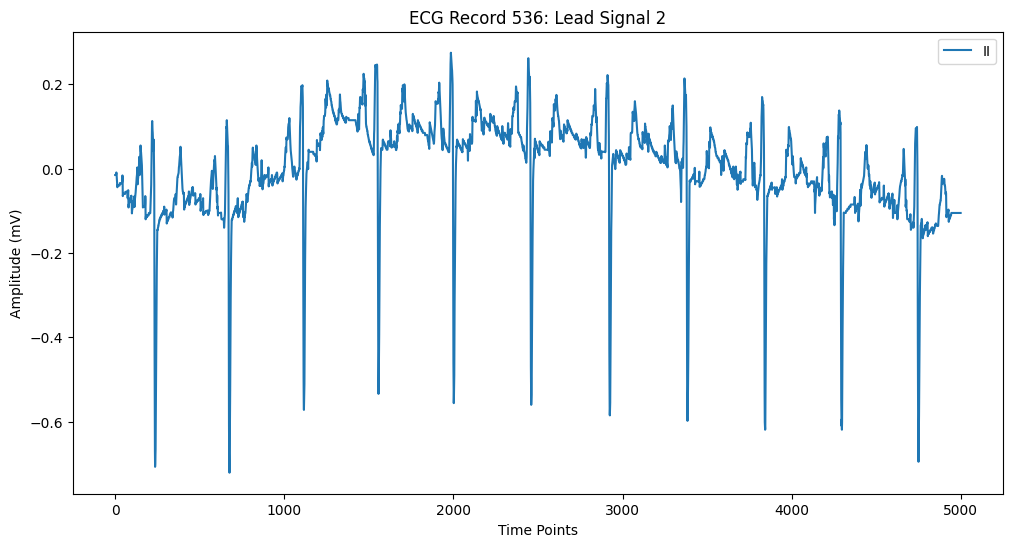

In [40]:
plot_signal(ecg_id, signals, fields)

<h3>Processing the Database for Multilabel Classification:</h3>

In [ ]:
def multilabel_processing(path: str, output_dir: str) -> None:
    '''
    Saves the PTB-XL database as a ".npz" file for multi-label classification.
    
    Args:
        path: The path where the PTB-XL database is located
        output_dir: The location where the compressed database will be saved
        
    Returns:
        None:
    '''
    # Loading database
    ptbxl_database, scp_statements = load_ptbxl(path)
    ptbxl_database = ptbxl_database.loc[:, ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device', 'scp_codes', 'filename_hr']]
    
    # Initializing superclass mapping
    superclasses = compile_superclasses(scp_statements)
    
    # Filtering out any records without superclasses
    ptbxl_database = get_superclass_records(ptbxl_database, superclasses)
    
    # Initializing arrays that will be stored in ".npz" file
    ecg_ids = np.array(ptbxl_database.index)
    signals = np.empty([*ecg_ids.shape, 5000], dtype=object)
    fields = np.empty([*ecg_ids.shape], dtype=dict)
    metadata = np.empty([*ecg_ids.shape, 7], dtype=list)
    superclasses = np.empty([*ecg_ids.shape], dtype=list)
      
    for i, ecg_id in enumerate(ecg_ids):
        
        try:
            record_signals, record_fields = get_record_signals(path, ptbxl_database, ecg_id)
            record_signals = get_single_lead_signal(record_signals, 2)
            
            signals[i] = record_signals
            fields[i] = record_fields
            
            metadata[i] = ptbxl_database.loc[ecg_id, :'device']
            
            # Finding and returning the corresponding superclasses
            record_superclasses = ptbxl_database.loc[ecg_id, 'scp_codes']
            superclasses[i] = record_superclasses
            
            print(f'Saved ECG Record {ecg_id} to {output_dir}.')
            
        except Exception as e:
            
            print(f'Error processing ECG Record {ecg_id}: {e}')
            return
            
    # Stores arrays into a compressed".npz" file
    np.savez_compressed(output_dir, ecg_ids=ecg_ids, signals=signals, fields=fields, metadata=metadata, superclasses=superclasses)

<h3>Storing the Processed Database as an ".npz" File:</h3>

In [ ]:
# Specifying output directory
output_dir = 'C:\\Users\\loera\\OneDrive\\Python Projects\\College\\ECG\\Processed Datasets\\ML_dataset'

In [43]:
multilabel_processing(path, output_dir)

Found 21388 records with superclasses.
Removed 411 records without superclasses.

Saved ECG Record 1 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 2 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 3 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 4 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 5 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 6 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 7 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 8 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 9 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 10 to C:\Users\loera\OneDrive\Python Projects\College\ECG\ML_dataset.
Saved ECG Record 11 to C:\Users\loera\OneDrive\Python Pro

<h3>Loading the Stored Database into DataFrames:</h3>

In [ ]:
def load_database(file_path: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    '''
    Loads a compressed ".npz" database from the specified path. Two identically indexed DataFrames are returned.
    
    Args:
        file_path: The path containing the compressed ".npz" file
        
    Returns:
        tuple: A tuple consisting of two DataFrames, one containing the PTB-XL metadata and the second containing
        all corresponding ECG signals
    '''
    # Loading the compressed file
    database = np.load(file_path, allow_pickle=True)
    
    # Extracting all the data from the loaded file
    ecg_ids = database['ecg_ids']
    signals = database['signals']
    fields = database['fields']
    metadata = database['metadata']
    superclasses = database['superclasses']
    
    data = {}
    
    # Further breaking down the metadata
    col_names = ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device']
    for i, col in enumerate(col_names):
        data[col] = pd.Series(metadata[:, i], index=ecg_ids)
    
    # Casting data in fields to literal dictionaries
    fields = np.array([ast.literal_eval(str(field)) for field in fields])
    
    # Adding fields and superclasses to the data
    data['fields'] = fields
    data['superclasses'] = superclasses
    
    ptbxl_df = pd.DataFrame(data=data, index=ecg_ids)
    signals_df = pd.DataFrame(data=signals, index=ecg_ids, dtype=float)
    
    return ptbxl_df, signals_df

In [45]:
npz_path = 'C:\\Users\\loera\\OneDrive\\Python Projects\\College\\ECG\\ML_dataset.npz'

In [46]:
ptbxl_df, signals_df = load_database(npz_path)

<h3>Plotting the Same Record From Before:</h3>

In [47]:
ecg_id = 536
record_signals = signals_df.loc[ecg_id,:]
record_fields = ptbxl_df.loc[ecg_id,'fields']

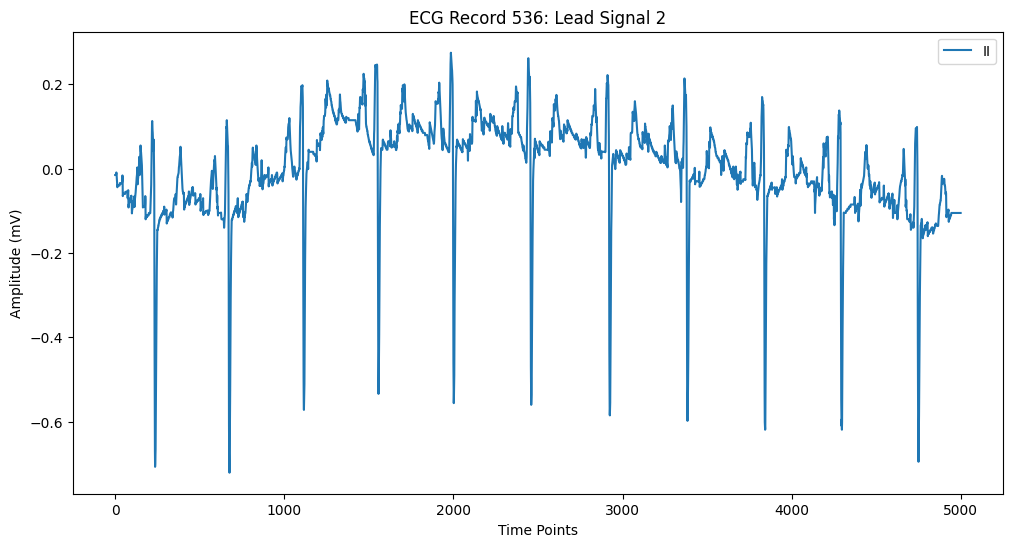

In [48]:
plot_signal(ecg_id, record_signals, record_fields)